In [2]:
from __future__ import print_function
import mxnet as mx
import numpy as np
from mxnet import nd, autograd
from mxnet import gluon
import matplotlib.pyplot as plt


# lets define first if we want to use cpu or gpu.
# Note: don't use gpu on small projects, it is a waste of resources!

ctx = mx.cpu()
# or if you're lucky enough!
#ctx = mx.gpu(0)

In [3]:
import mxnet as mx

# uncomment to download the pretrained network
path='http://data.mxnet.io/models/imagenet-11k/'
[mx.test_utils.download(path+'resnet-152/resnet-152-symbol.json'),
 mx.test_utils.download(path+'resnet-152/resnet-152-0000.params'),
 mx.test_utils.download(path+'synset.txt')]

['resnet-152-symbol.json', 'resnet-152-0000.params', 'synset.txt']

In [4]:
sym, arg_params, aux_params = mx.model.load_checkpoint('C:/Users/shohidul/Desktop/BigDataAnalysis/Lecture_5_Introduction_to_DL_and_DL_for_CV/pretrained/resnet-152', 0)
mod = mx.mod.Module(symbol=sym, context=mx.cpu(), label_names=None)
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))], 
         label_shapes=mod._label_shapes)
mod.set_params(arg_params, aux_params, allow_missing=True)
with open('C:/Users/shohidul/Desktop/BigDataAnalysis/Lecture_5_Introduction_to_DL_and_DL_for_CV/synset.txt', 'r') as f:
    labels = [l.rstrip() for l in f]

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
# define a simple data batch
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

In [6]:
def get_image(url, show=False):
    if url.startswith('http'):
        # download and show the image
        fname = mx.test_utils.download(url)
    else:
        fname = url
    img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)
    if img is None:
         return None
    if show:
         plt.imshow(img)
         plt.axis('off')
    # convert into format (batch, RGB, width, height)
    img = cv2.resize(img, (224, 224))
    img = np.swapaxes(img, 0, 2)
    img = np.swapaxes(img, 1, 2)
    img = img[np.newaxis, :]
    return img

def predict(url):
    img = get_image(url, show=True)
    # compute the predict probabilities
    mod.forward(Batch([mx.nd.array(img)]))
    prob = mod.get_outputs()[0].asnumpy()
    # print the top-5
    prob = np.squeeze(prob)
    a = np.argsort(prob)[::-1]
    for i in a[0:5]:
        print('probability=%f, class=%s' %(prob[i], labels[i]))


In [7]:
import os
import os.path

n = 10
fext = ".png"

for dirpath, dirnames, filenames in os.walk("C:/Users/shohidul/Downloads/weapons_dataset/weapons_dataset/rifle/rifle/Images1"):
    for filename in [f for f in filenames if f.endswith(fext)][:n]:
        print (filename)

001b3755-d28a-4c54-bb20-aa512fcc3481.png
001bec2b-2c1f-417d-866e-436f6b9afab6.png
0021baf6-b8db-4ce1-bb36-4885a11d2164.png
0049fb24-9dce-4b9a-a004-215dea4c8c13.png
006a294b-d19d-4cf5-983b-a4dc7e73c366.png
0083ade6-4405-4b26-bcd8-b6aaba8f1397.png
008f380c-848d-4a12-8340-39bdc00bdab7.png
00a42542-e50b-4c7e-bdd8-51e8caf0ff73.png
00b5ca2c-0a41-4e33-b799-c07f9df31cd8.png
00ca1874-2aee-4cf3-85f8-6ab20d2bd015.png


In [54]:
filenames[0]

'001b3755-d28a-4c54-bb20-aa512fcc3481.png'

probability=0.077233, class=n10701962 tenor saxophonist, tenorist
probability=0.068257, class=n06596727 slick, slick magazine, glossy
probability=0.049097, class=n06596474 news magazine
probability=0.040303, class=n02475669 Homo sapiens sapiens, modern man
probability=0.033680, class=n06595351 magazine, mag


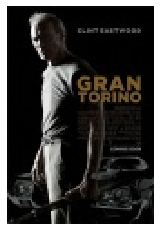

In [57]:
predict("C:/Users/shohidul/Downloads/weapons_dataset/weapons_dataset/rifle/rifle/Images1/00ca1874-2aee-4cf3-85f8-6ab20d2bd015.png")

In [20]:
# list the last 10 layers
all_layers = sym.get_internals()
all_layers.list_outputs()[-10:]

['bn1_moving_var',
 'bn1_output',
 'relu1_output',
 'pool1_output',
 'flatten0_output',
 'fc1_weight',
 'fc1_bias',
 'fc1_output',
 'softmax_label',
 'softmax_output']

In [21]:
fe_sym = all_layers['flatten0_output']
fe_mod = mx.mod.Module(symbol=fe_sym, context=mx.cpu(), label_names=None)
fe_mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))])
fe_mod.set_params(arg_params, aux_params)

In [22]:
def get_features(img):
    fe_mod.forward(Batch([mx.nd.array(img)]))
    features = fe_mod.get_outputs()[0].asnumpy()
    return features

In [23]:
img = get_image('https://icatcare.org/app/uploads/2018/07/Thinking-of-getting-a-cat.png')
features = get_features(img)
print("{}\n shape: {}".format(features,features.shape))

[[1.5154335  0.5365093  1.619796   ... 0.6847112  0.22984675 0.85151905]]
 shape: (1, 2048)


In [23]:
# from https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data
from os import listdir
from os.path import isfile, join
import os

#mypath = join(os.getcwd(),"C:/Users/shohidul/Downloads/weapons_dataset/weapons_dataset/other/other/Images1")
mypath = join(os.getcwd(),"C:/Users/shohidul/Desktop/dogvscat/dogs-vs-cats-redux-kernels-edition/train")

cats_imgs = [join(mypath,f) for f in listdir(mypath) if f.startswith('cat')]
dogs_imgs = [join(mypath,f) for f in listdir(mypath) if f.startswith('dog')]


In [24]:
print("cats: {} and dogs: {}".format(len(cats_imgs),len(dogs_imgs)))

cats: 12500 and dogs: 7778


In [48]:
Nmax = 100
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]

NameError: name 'get_features' is not defined

In [27]:
Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

In [28]:
X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cvd, Y_cvd, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression().fit(X_train, y_train)

print("Test set score: {:.2f}".format(lg.score(X_test, y_test)))


C:\Users\shohidul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test set score: 0.12


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,120]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [ ]:
Nmax = 1000
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]

In [ ]:
Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

In [ ]:
X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cvd, Y_cvd, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression().fit(X_train, y_train)

print("Test set score: {:.2f}".format(lg.score(X_test, y_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,120]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [ ]:
Nmax = 5000
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]

In [ ]:
Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

In [ ]:
X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cvd, Y_cvd, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression().fit(X_train, y_train)

print("Test set score: {:.2f}".format(lg.score(X_test, y_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,120]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

In [ ]:
Nmax = 12500
cats_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]
dogs_features = [get_features(get_image(img)).ravel() for img in cats_imgs[:Nmax]]

In [ ]:
Y_cats = np.array(Nmax * [1])
Y_dogs = np.array(Nmax * [0])

In [ ]:
X_cvd = np.vstack([cats_features,dogs_features])
Y_cvd = np.vstack([Y_cats,Y_dogs]).ravel()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cvd, Y_cvd, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression().fit(X_train, y_train)

print("Test set score: {:.2f}".format(lg.score(X_test, y_test)))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,120]}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))